In [ ]:
import pandas as pd

In [ ]:
test_case = pd.read_csv("test.csv")
train_case = pd.read_csv("train.csv")
dataset = train_case
print(dataset)

In [ ]:
dataset.corr()
print(dataset)

In [ ]:
feature_columns = dataset.drop(columns=['price_range'])
target_column = dataset['price_range']

In [ ]:
from sklearn.model_selection import train_test_split
X = feature_columns
y = target_column
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.33)

Classifier dengan data yang di split

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf = clf.fit(feature_columns, target_column)

Classifier dengan semua data tanpa split train

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# full_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
# full_clf = full_clf.fit(feature_columns, target_column)

In [ ]:
predictions = clf.predict(X_test)
predictions

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions, average='weighted')

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions, average='weighted')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['accuracy_score', 'confusion_matrix', 'precision_score', 'recall_score']))

In [ ]:
feature_names = X.columns
feature_names

In [ ]:
feature_importance = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['Importance'])
feature_importance

In [ ]:
feature_importance = feature_importance.sort_values('Importance', ascending=False)

In [ ]:
from matplotlib import pyplot as plt
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), feature_importance['Importance'][:top_n], align='center')
plt.yticks(range(top_n), feature_importance.index[:top_n])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances - Decision Tree Regressor')
plt.show()

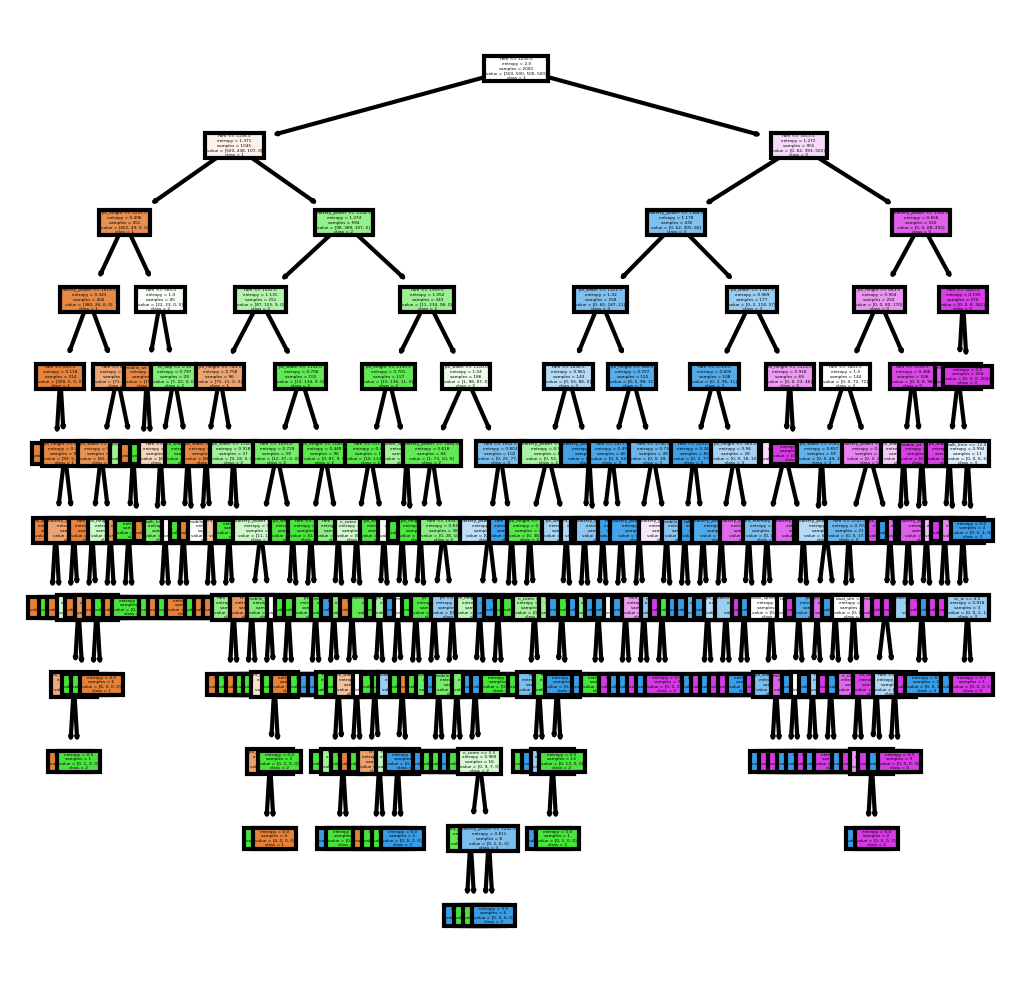

In [194]:

# fn = ['ram','battery_power', 'px_width', 'px_height']
fn = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
cn = [str(i) for i in dataset['price_range'].unique()]

fig, axes = plt.subplots(nrows= 1, ncols=1, figsize = (4,4), dpi = 300)
tree.plot_tree (clf,
                feature_names=fn,
                class_names= cn,
                filled=True)
fig.savefig('../DecisionTree-py')